## Laboratorio 1 PCA

Jorge Caballeros Pérez  20009
Mariana David Sosa     

In [6]:
import pandas as pd

data = pd.read_csv('risk_factors_cervical_cancer.csv')
data.head()




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [7]:

data = data.replace("?", pd.NaT)


missing_values = data.isnull().sum()


numerical_stats = data.describe()


categorical_stats = data.describe(include=['O'])

missing_values, numerical_stats, categorical_stats


(Age                                     0
 Number of sexual partners              26
 First sexual intercourse                7
 Num of pregnancies                     56
 Smokes                                 13
 Smokes (years)                         13
 Smokes (packs/year)                    13
 Hormonal Contraceptives               108
 Hormonal Contraceptives (years)       108
 IUD                                   117
 IUD (years)                           117
 STDs                                  105
 STDs (number)                         105
 STDs:condylomatosis                   105
 STDs:cervical condylomatosis          105
 STDs:vaginal condylomatosis           105
 STDs:vulvo-perineal condylomatosis    105
 STDs:syphilis                         105
 STDs:pelvic inflammatory disease      105
 STDs:genital herpes                   105
 STDs:molluscum contagiosum            105
 STDs:AIDS                             105
 STDs:HIV                              105
 STDs:Hepat

__Análisis:__

Hay algunos datos faltantes en varias columnas. Por ejemplo, "Number of sexual partners" tiene 26 valores faltantes, "Num of pregnancies" tiene 56, y "Smokes" tiene 13. También, las columnas "STDs: Time since first diagnosis" y "STDs: Time since last diagnosis" tienen 787 valores faltantes, lo cual es bastante considerando que hay 858 filas en total.

Las columnas numéricas mayormente contienen valores binarios (0 y 1). Por ejemplo, la columna 'Age' tiene un rango de 13 a 84, con un promedio cercano a 26.8.

En cuanto a las columnas categóricas, la mayoría también parecen ser binarias (0.0 y 1.0). Algunas, como "Number of sexual partners", "First sexual intercourse" y "Num of pregnancies", tienen varios valores distintos.

__2. Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua,cuantitativa discreta)__

* __Cuantitativas discretas:__ 'Age', 'Number of sexual partners', 'Num of pregnancies', 'STDs (number)', 'STDs: Number of diagnosis'.

* __Cuantitativas continuas:__ 'First sexual intercourse', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'

* __Cualitativas:__ 'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'


3. __Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.__

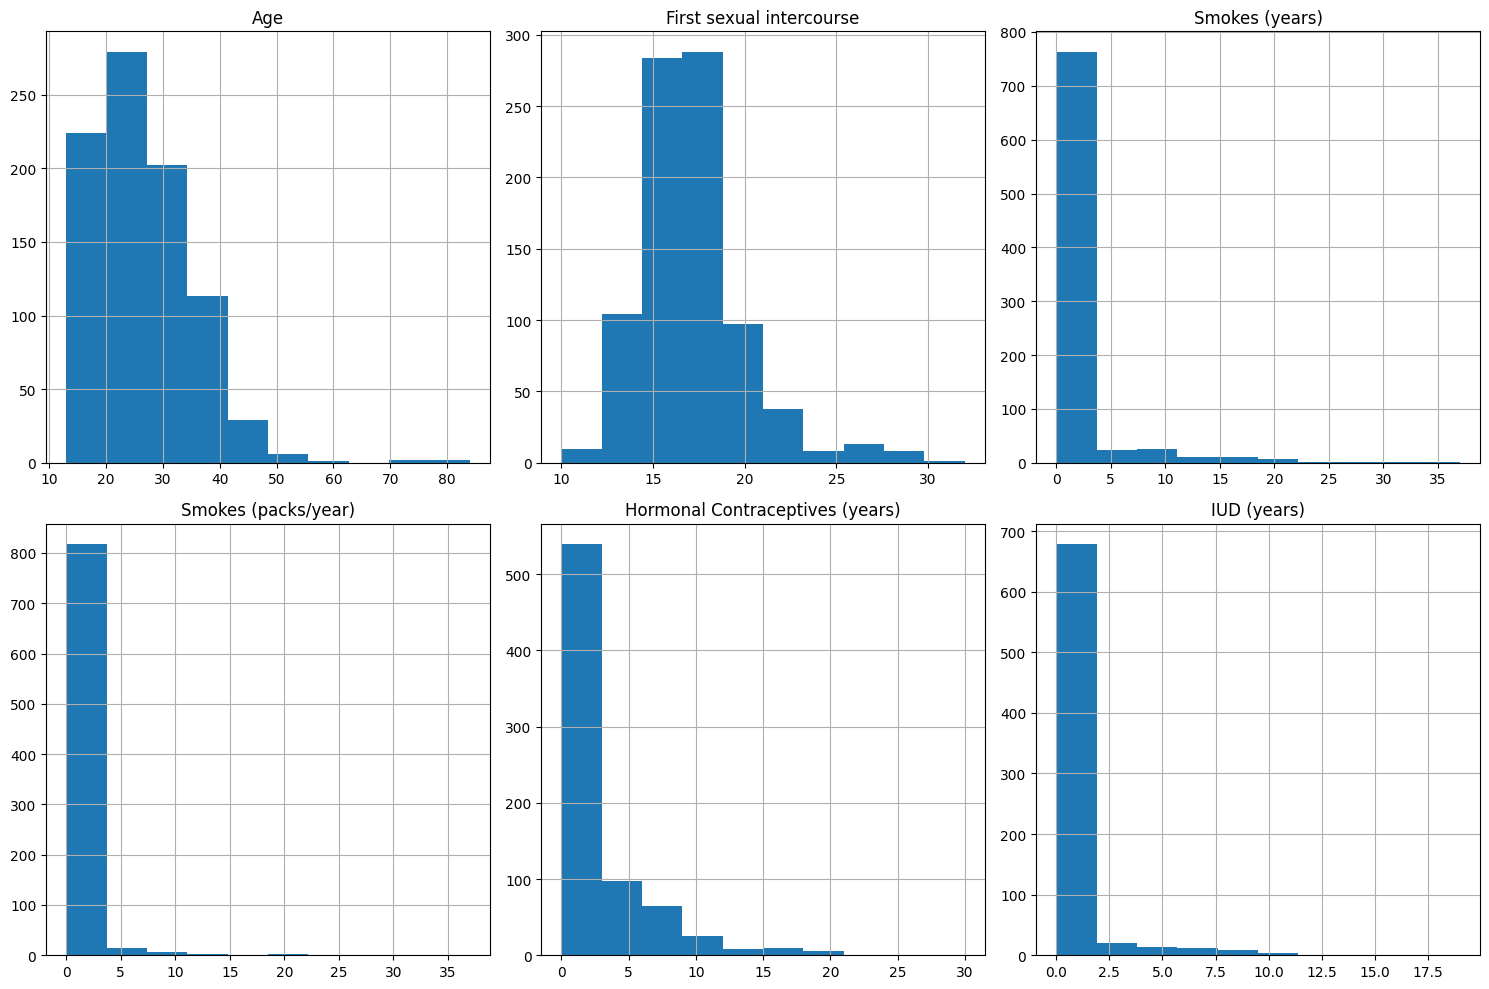

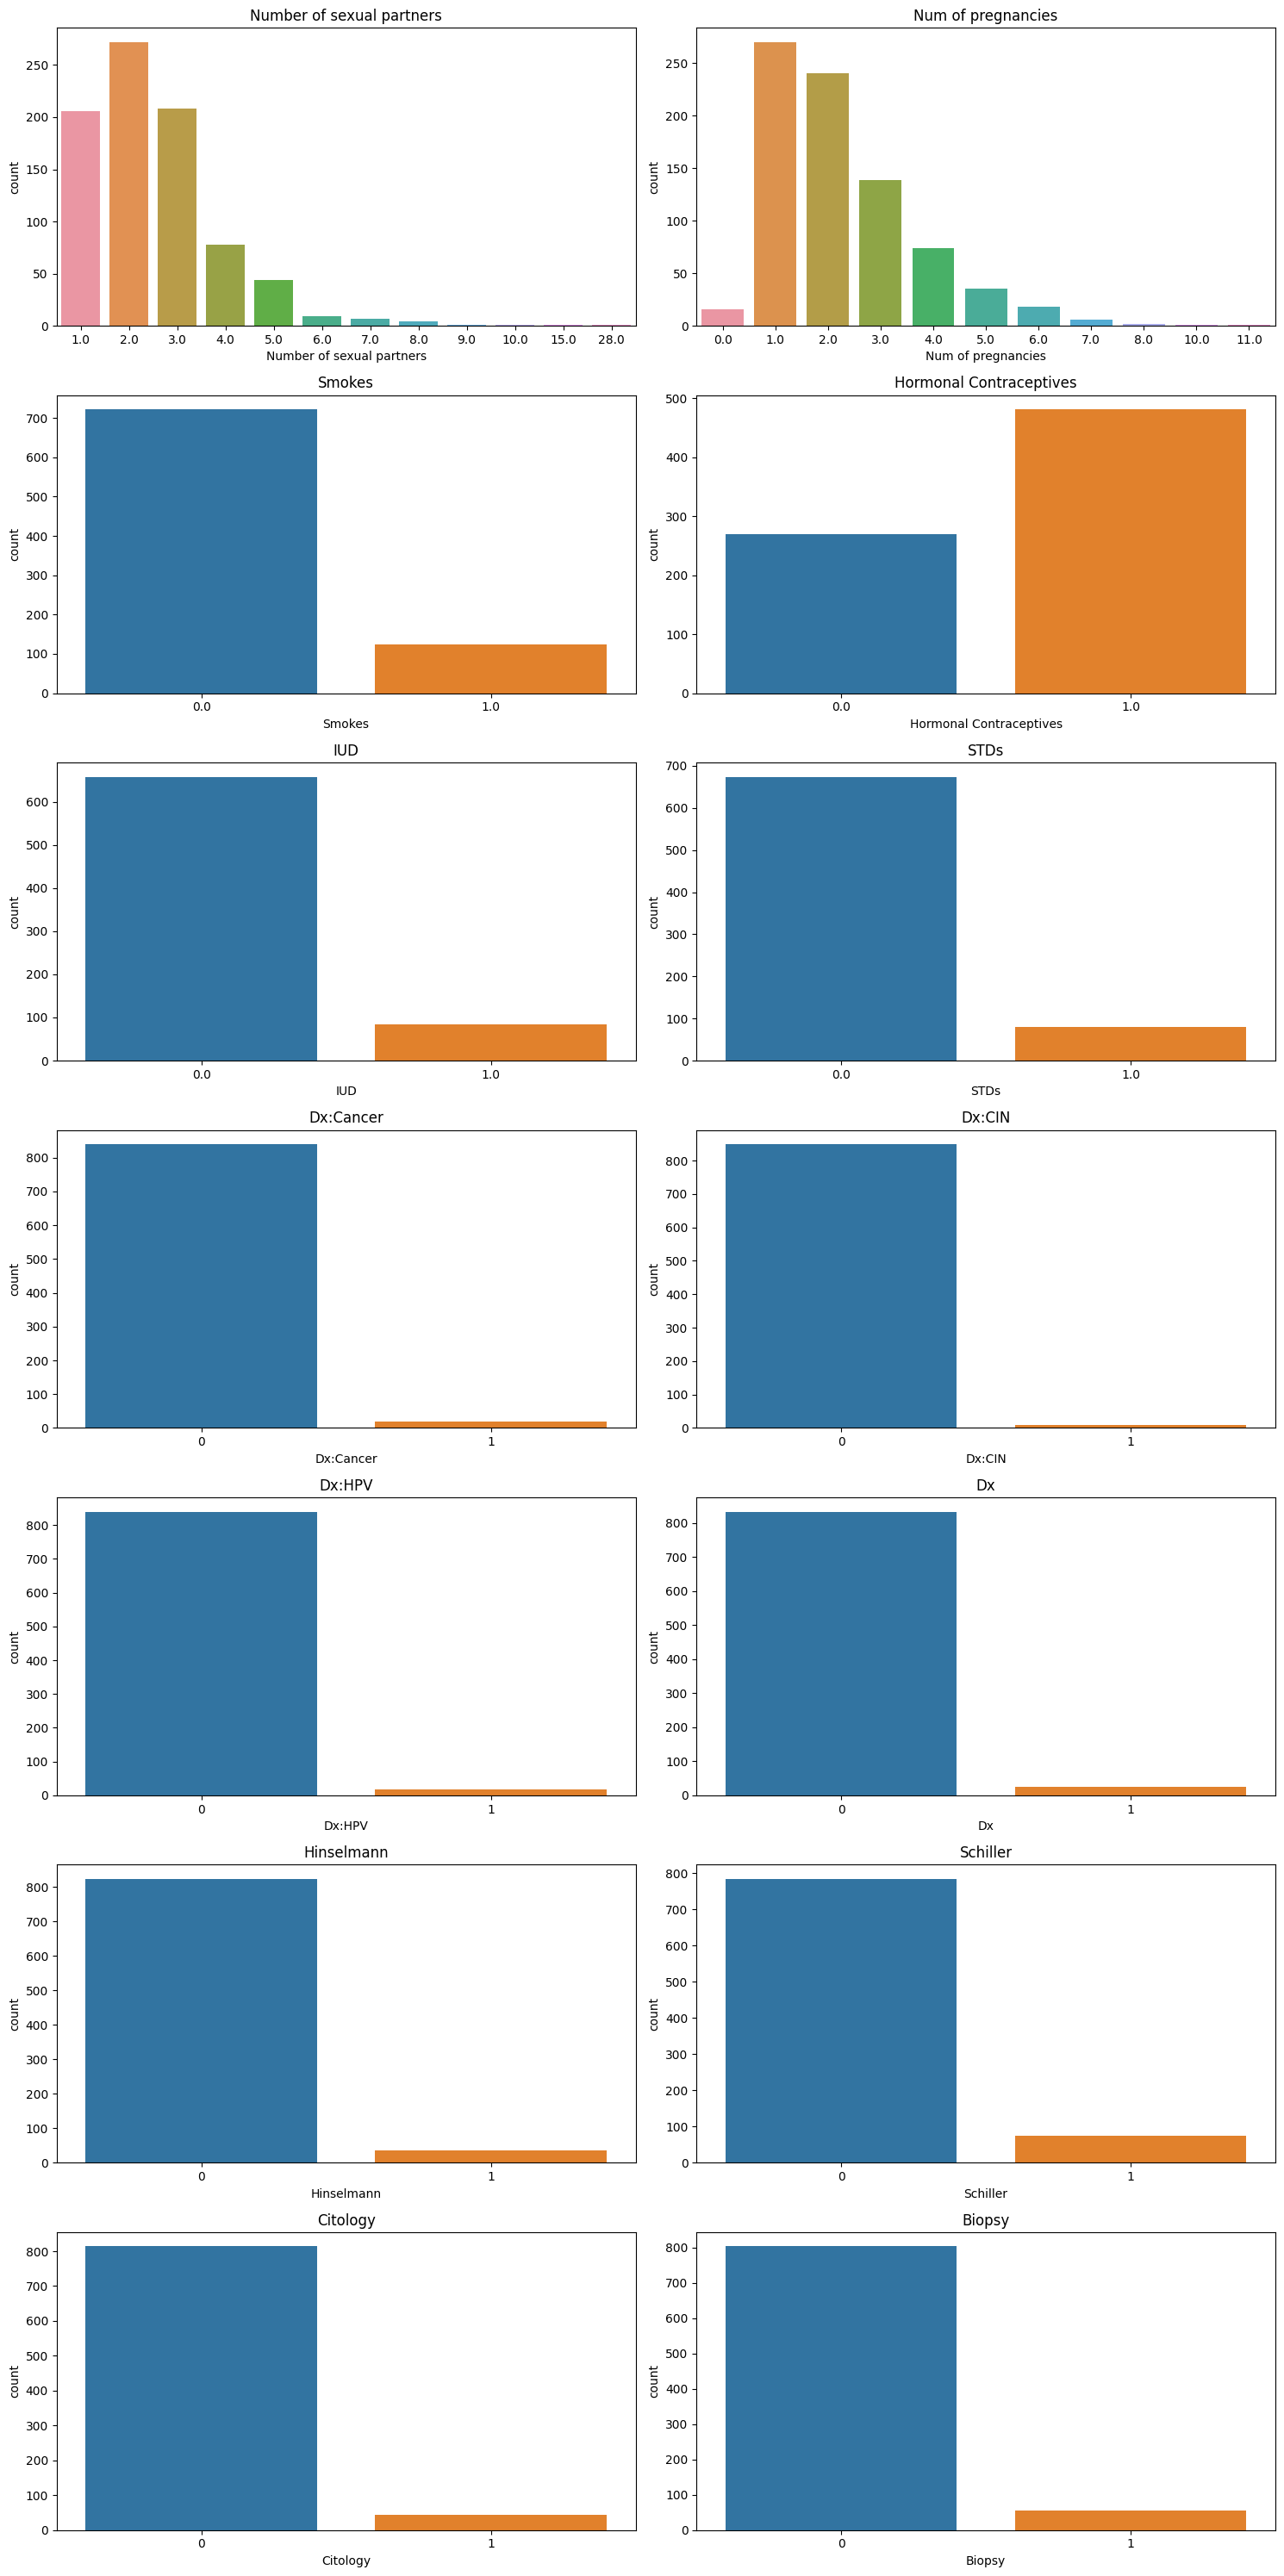

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
                   'IUD (years)', 'STDs (number)']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

continuous_vars = ['Age', 'First sexual intercourse', 'Smokes (years)', 'Smokes (packs/year)',
                   'Hormonal Contraceptives (years)', 'IUD (years)']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(continuous_vars):
    ax = axes[i//3, i%3]
    data[var].dropna().hist(ax=ax)
    ax.set_title(var)

fig.tight_layout()
plt.show()

discrete_and_categorical_vars = ['Number of sexual partners', 'Num of pregnancies', 'Smokes', 
                                 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 
                                 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))

for i, var in enumerate(discrete_and_categorical_vars):
    ax = axes[i//2, i%2]
    sns.countplot(data=data, x=var, ax=ax)
    ax.set_title(var)

fig.tight_layout()
plt.show()


__4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.__

In [9]:

data = data.replace('?', pd.NaT)

numeric_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
                   'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)',
                   'IUD (years)', 'STDs (number)']

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

correlation_matrix


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.085634,0.370017,0.548856,0.218619,0.131946,0.289783,0.216101,-0.016186,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.085634,1.000000,-0.150169,0.079081,0.186932,0.182067,0.019569,0.004454,0.041442,0.051900,0.022316,0.015694,0.027273,0.022992,-0.039847,-0.008967,0.021858,-0.001442
First sexual intercourse,0.370017,-0.150169,1.000000,-0.060733,-0.058834,-0.056755,0.008308,-0.026503,0.006745,-0.013332,0.067289,-0.032628,0.043970,0.035755,-0.016549,0.003495,-0.010973,0.007264
Num of pregnancies,0.548856,0.079081,-0.060733,1.000000,0.180331,0.100904,0.224790,0.154987,0.001744,0.034153,0.035149,0.010985,0.046788,0.021336,0.040439,0.092017,-0.030036,0.046416
Smokes (years),0.218619,0.186932,-0.058834,0.180331,1.000000,0.724116,0.050979,0.040220,0.098772,0.084647,0.056234,-0.030968,0.058847,-0.049926,0.072251,0.095890,-0.006827,0.062044
Smokes (packs/year),0.131946,0.182067,-0.056755,0.100904,0.724116,1.000000,0.041278,0.016584,0.032658,0.033357,0.111572,-0.021128,0.113516,-0.034063,0.027044,0.018191,0.004666,0.024882
Hormonal Contraceptives (years),0.289783,0.019569,0.008308,0.224790,0.050979,0.041278,1.000000,0.000483,-0.007055,-0.038459,0.054712,0.003273,0.063229,-0.013446,0.038945,0.079247,0.076263,0.079388
IUD (years),0.216101,0.004454,-0.026503,0.154987,0.040220,0.016584,0.000483,1.000000,0.015666,0.007903,0.098113,0.018001,0.033647,0.111993,0.007994,0.079415,0.002715,0.033275
STDs (number),-0.016186,0.041442,0.006745,0.001744,0.098772,0.032658,-0.007055,0.015666,1.000000,0.897233,-0.018256,-0.009526,-0.018256,-0.028341,0.065349,0.120725,0.060010,0.098347
STDs: Number of diagnosis,-0.001606,0.051900,-0.013332,0.034153,0.084647,0.033357,-0.038459,0.007903,0.897233,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449


__5.  Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.__

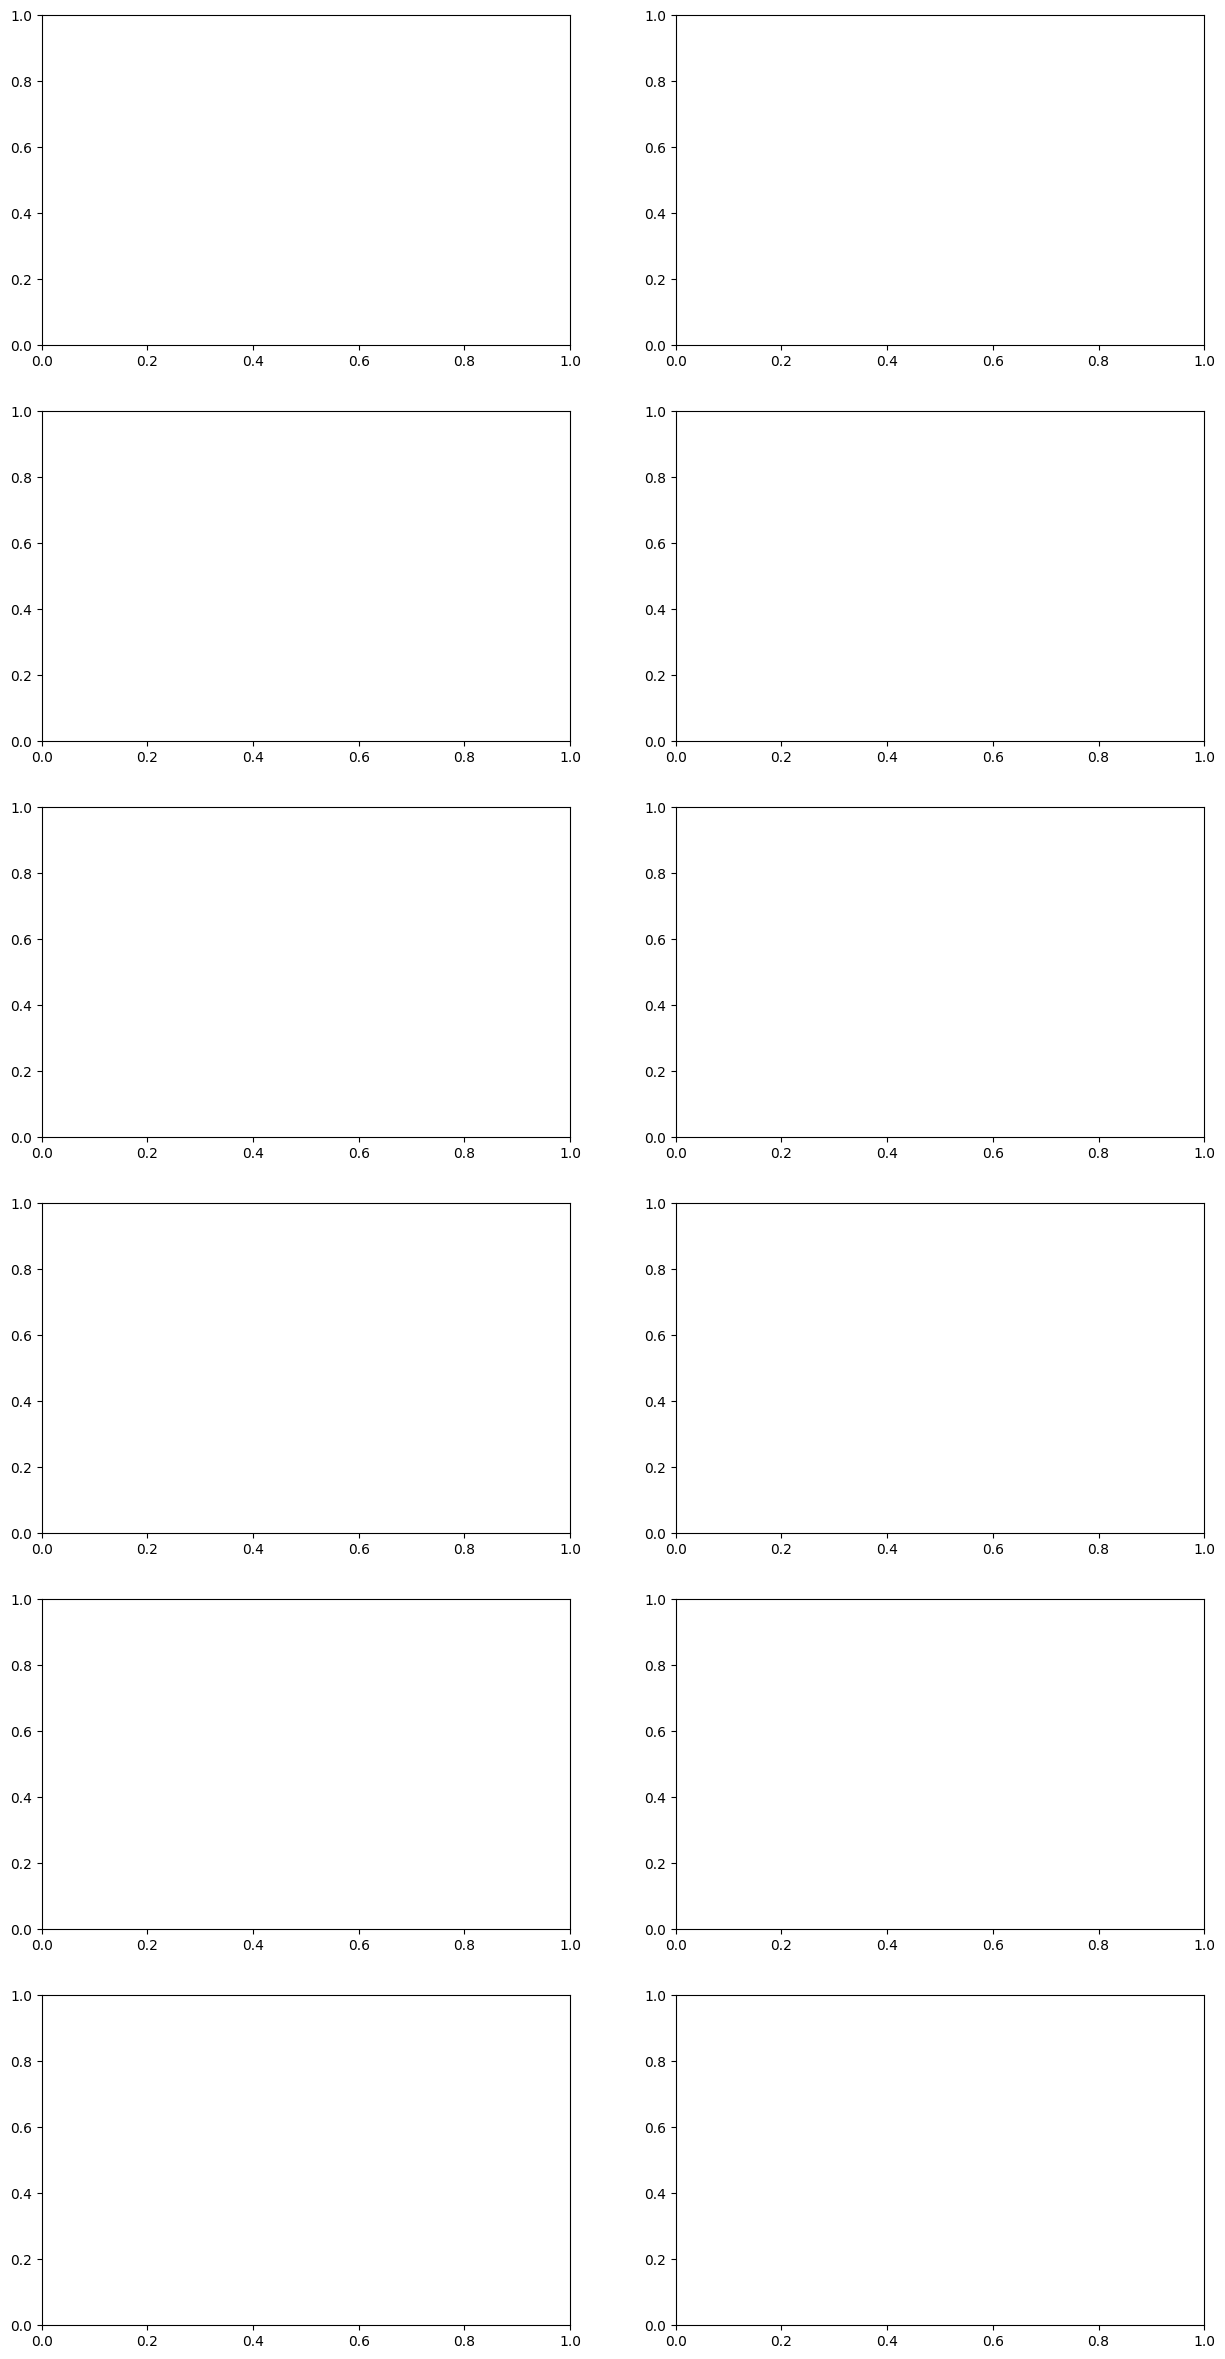

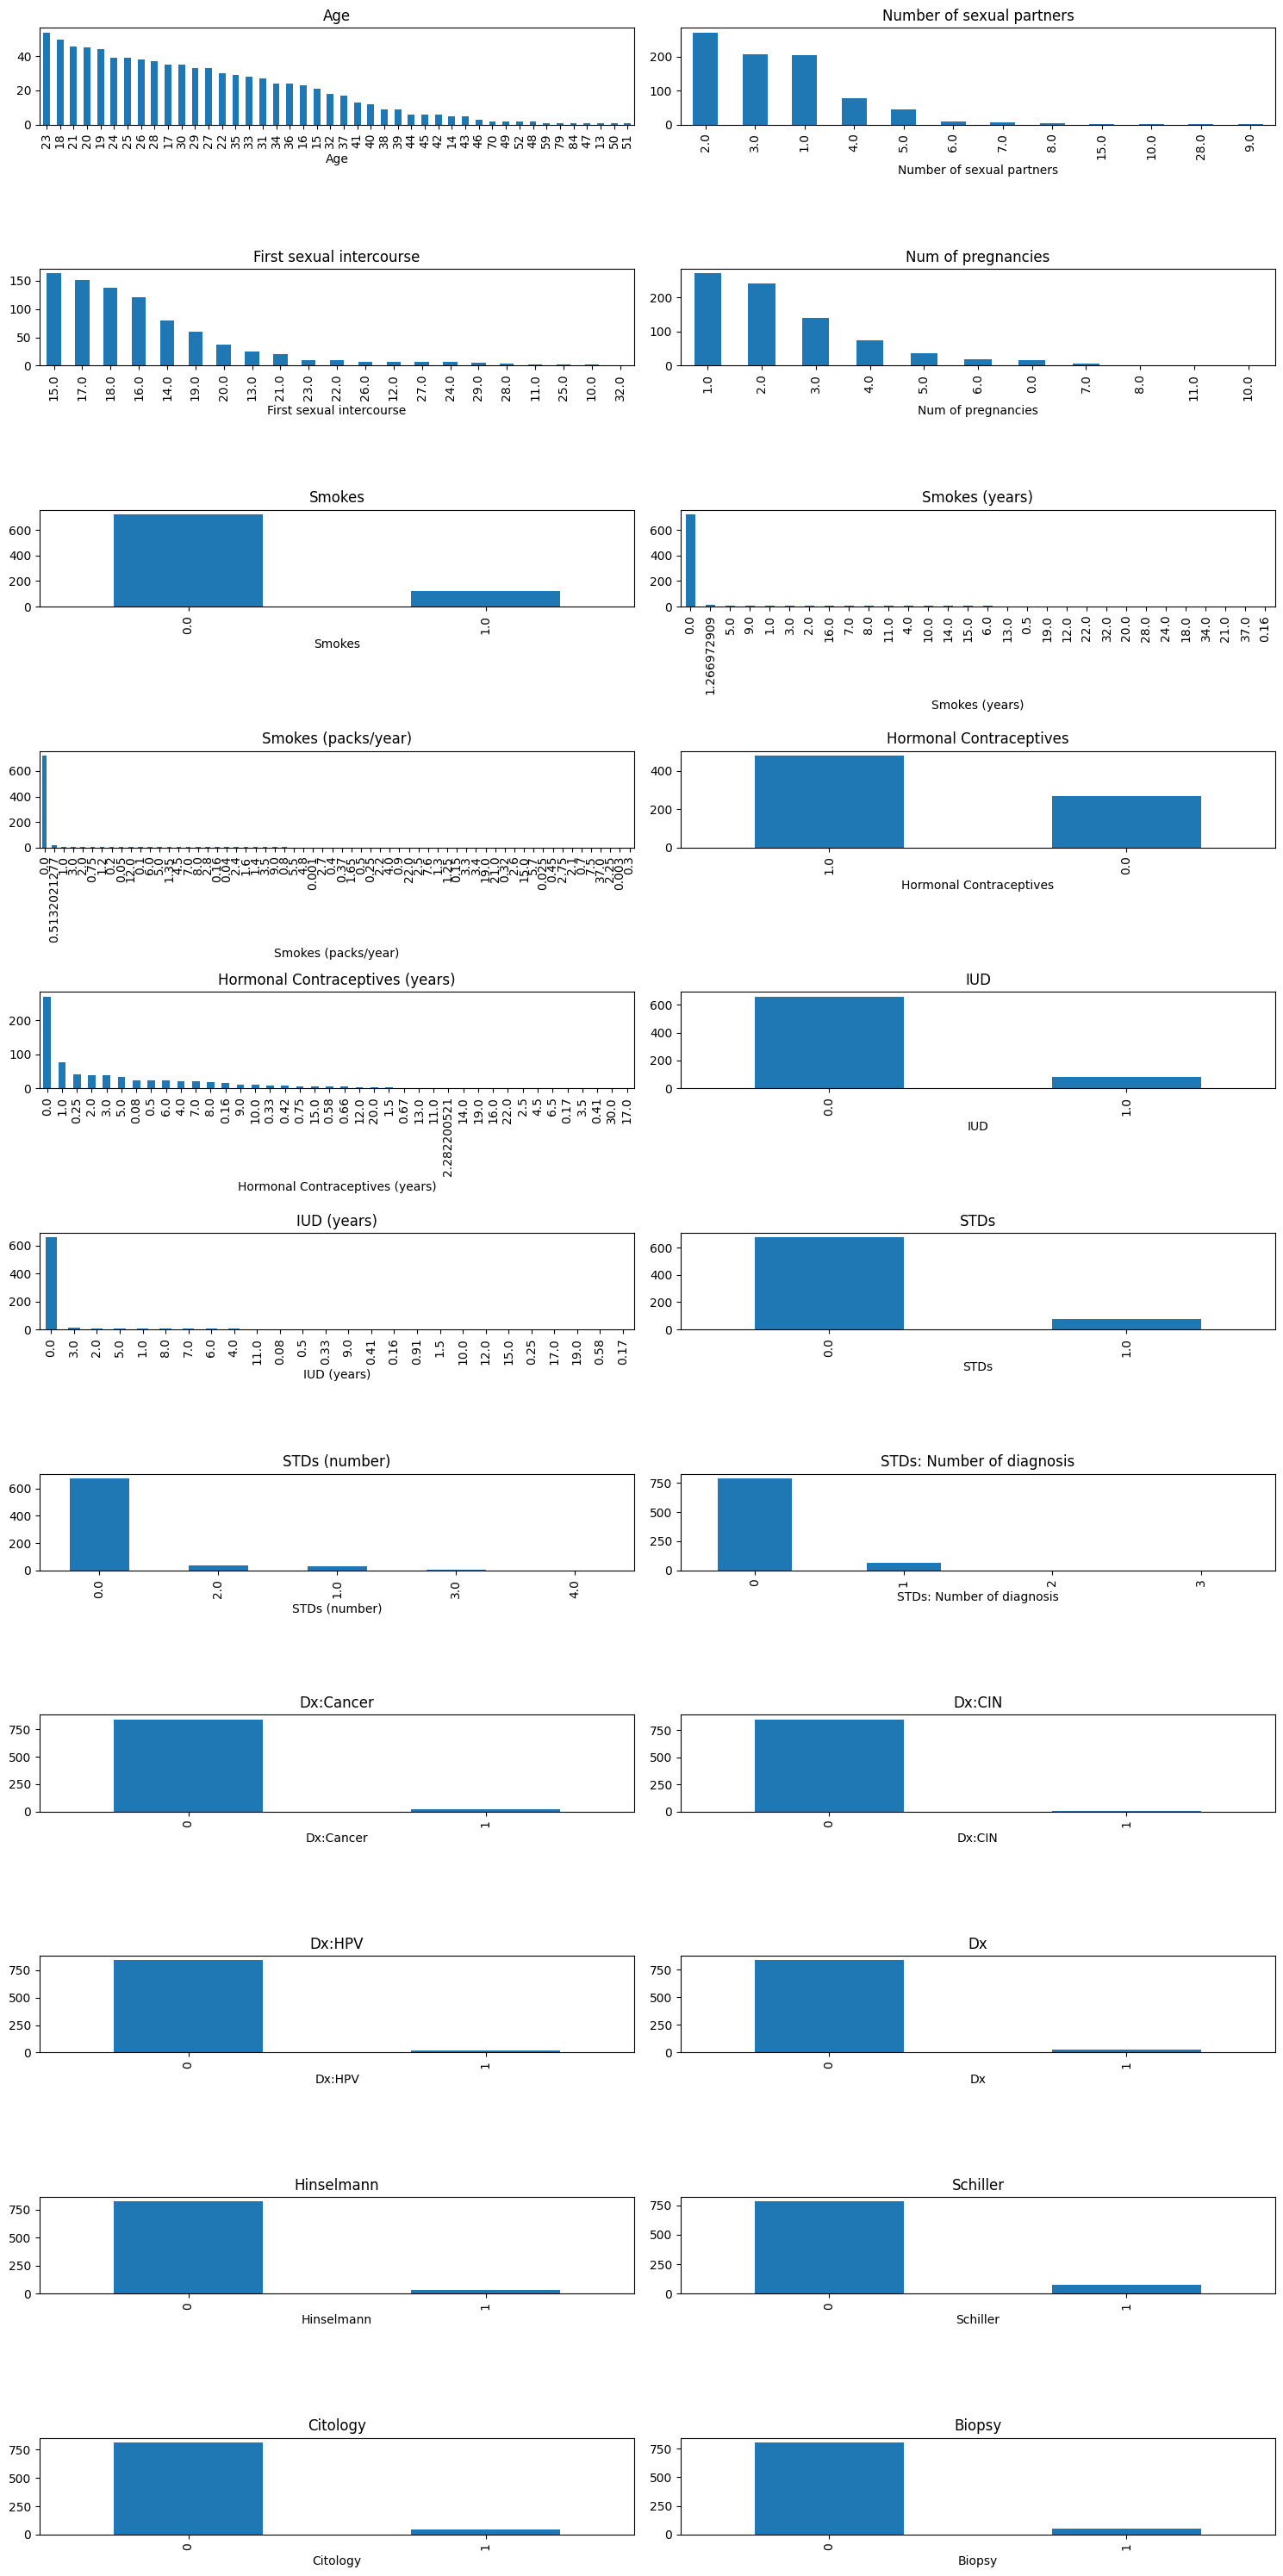

In [12]:
categorical_columns = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 
                       'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

for col in categorical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

categorical_data = data.select_dtypes(include=['float64', 'int64'])

frequency_tables = {}
for col in categorical_data.columns:
    frequency_tables[col] = categorical_data[col].value_counts()


frequency_tables

proportions = {}
for col in categorical_data.columns:
    proportions[col] = categorical_data[col].value_counts(normalize=True)

proportions

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
num_vars = len(categorical_data.columns)
num_rows = num_vars // 2 if num_vars % 2 == 0 else num_vars // 2 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 30))
axes = axes.ravel()  

for i, var in enumerate(categorical_data.columns):
    categorical_data[var].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(var)

if num_vars % 2 != 0:
    fig.delaxes(axes[-1])

fig.tight_layout()
plt.show()
